In [1]:
from os import listdir
from matplotlib.pyplot import imread,imshow,figure,show
from skimage.color import rgb2hsv
from skimage.color import rgb2gray
import numpy as np
from skimage import feature as sk_feature
from scipy.spatial.distance import euclidean
import operator

In [2]:
def color_features(image):
    hsv = rgb2hsv(imread(image))
    R = hsv[:,:,0]
    G = hsv[:,:,1]
    B = hsv[:,:,2]
    feature = [np.mean(R[:]),np.std(R[:]),np.mean(G[:]),np.std(G[:]),np.mean(B[:]),np.std(B[:])]
    return feature

# feature = color_features("dataset/382001.jpg")
# print(feature)

In [3]:
def histogram_features(image):
    hsv = rgb2hsv(imread(image))
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    v = hsv[:,:,2]

    feature = np.zeros((8,2,2))

    h_max = h.max()
    s_max = s.max()
    v_max = v.max()

    h_quantized = np.ceil((8 * h)/h_max);
    s_quantized = np.ceil((2 * s)/s_max);
    v_quantized = np.ceil((2 * v)/v_max);
    
    dimensions = hsv.shape
    
    index = np.zeros((dimensions[0]*dimensions[1],3))
    index[:,0] = h_quantized.T.flatten()
    index[:,1] = s_quantized.T.flatten()
    index[:,2] = v_quantized.T.flatten()

    for row in range(0,dimensions[0]*dimensions[1]):
        if(index[row][0]==0 or index[row][1]==0 or index[row][2]==0):
            continue
        feature[int(index[row][0])-1][int(index[row][1])-1][int(index[row][2])-1]=feature[int(index[row][0])-1][int(index[row][1])-1][int(index[row][2])-1]+1

    return feature.flatten().tolist()

# feature = histogram_features("dataset/382001.jpg")
# print(feature

In [4]:
def texture_features(image):
    image = np.array(rgb2gray(imread(image)), int)
    
    glcm = sk_feature.greycomatrix(image,distances=[0,1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],levels=255 , symmetric=True, normed=True)
    
    feature = np.concatenate((sk_feature.greycoprops(glcm, 'contrast'),sk_feature.greycoprops(glcm, 'correlation'),sk_feature.greycoprops(glcm, 'energy'),sk_feature.greycoprops(glcm, 'homogeneity')))
    feature = feature/np.sum(feature)
    
    return feature.flatten().tolist()

# feature = texture_features("dataset/382001.jpg")
# print(feature)

In [5]:
def getFeatures(path,fsize,type="folder"):
    if type == "folder":
        images = listdir(path)
        features = []
        for image in images:
            feature = []
            if fsize >= 6:
                color_feature = color_features(path + "/" + image)
                feature += color_feature
            if fsize >= 32:
                histogram_feature = histogram_features(path + "/" + image)
                feature += histogram_feature
            if fsize >= 36:
                texture_feature = texture_features(path + "/" + image)
                feature += texture_feature
            features.append(feature)
        return features,images
    else:
        features = []
        if fsize >= 6:
            color_feature = color_features(path)
            features += color_feature
        if fsize >= 32:
            histogram_feature = histogram_features(path)
            features += histogram_feature
        if fsize >= 36:
            texture_feature = texture_features(path)
            features += texture_feature
        return features    
    
# getFeatures("dataset",32,"folder")

In [6]:
def cbir_recherche(features,images,path_image_req,fsize):
    distances = {}
    i=0
    for feature in features:
        e = euclidean(feature,getFeatures(path_image_req,fsize,"image"))
        distances[images[i]]= e
        i += 1
    sorted_distances = sorted(distances.items(), key=operator.itemgetter(1))
    return sorted_distances

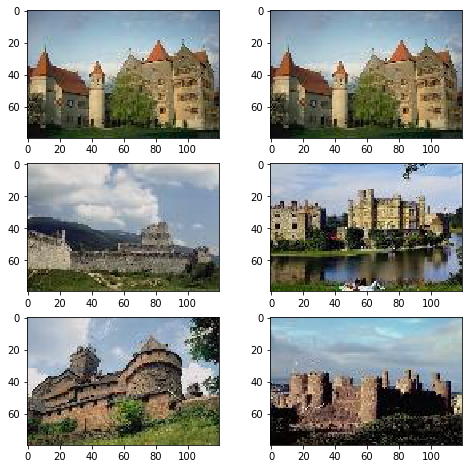

In [7]:
path_of_dataset = "dataset"
path_image_req = "ImageRequete.jpg"
fsize= 32

features,images = getFeatures(path_of_dataset,fsize, "folder")
sorted_distances = cbir_recherche(features,images,path_image_req,fsize)

fig=figure(figsize=(8, 8))
columns = 2
rows = 3

img = imread(path_image_req)
fig.add_subplot(rows, columns, 1)
imshow(img)

for i in range(1, columns*rows):
    img = imread(path_of_dataset + "/" + sorted_distances[i-1][0])
    fig.add_subplot(rows, columns, i+1)
    imshow(img)

show()